# Tratamento de Dados de Telecomunicações

O objetivo deste projeto é realizar a **exploração e o tratamento de dados** de uma base de clientes de uma empresa de telecomunicações, com foco na preparação dos dados para modelagem preditiva de churn (como classificação).

O projeto está dividido em dois arquivos, sendo este o primeiro, que aborda:

**Tratamento de Dados**:  
- Tratamento de valores nulos  
- Correção de inconsistências  
- Padronização de variáveis  

Este trabalho visa garantir que a base esteja limpa, consistente e estruturada para usos futuros, como a construção de modelos de machine learning ou dashboards analíticos.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Importação
df = pd.read_csv("/content/churn_telecom_data.csv", delimiter=';')

df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes


## Dicionário de Dados

| Nome da Coluna         | Descrição                                                                 |
|------------------------|---------------------------------------------------------------------------|
| **CustomerID**         | ID único de cada cliente da rede de produtos de telecomunicação.          |
| **Genero**             | Gênero do cliente.                                                        |
| **Idoso**              | Indica se o cliente tem 60 anos ou mais. (Sim = 1, Não = 0)              |
| **Casado**             | Indica se o cliente é casado.                                             |
| **Dependents**         | Indica se o cliente possui dependentes.                                   |
| **Tempo_como_Cliente** | Tempo (em meses) que o cliente está na empresa.                           |
| **PhoneService**       | Indica se o cliente contratou serviço telefônico.                         |
| **Servico_Internet**   | Tipo de serviço de internet contratado.                                   |
| **Servico_Seguranca**  | Indica se o cliente contratou serviço de segurança.                       |
| **Suporte_Tecnico**    | Indica se o cliente já acionou o suporte técnico.                         |
| **StreamingTV**        | Indica se o cliente contratou serviço de streaming para TV.               |
| **Tipo_Contrato**      | Tipo de contrato (mensal, anual etc.).                                    |
| **PaymentMethod**      | Forma de pagamento utilizada pelo cliente.                                |
| **Pagamento_Mensal**   | Valor pago mensalmente pelo cliente.                                      |
| **Total_Pago**         | Valor total já pago pelo cliente à empresa.                               |
| **Churn**              | Indica se o cliente abandonou a empresa.                                  |



## Tratamento de dados

In [25]:
# Verifica tipo e dados não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

Os tipos dos dados estão de acordo com as informações de cada coluna.

### Tratamento de dados nulos

In [26]:
# Verifica a porcentagem de nulos por coluna
(df.isnull().sum() / df.shape[0]) * 100

,0
customerID,0.00
Genero,0.48
Idoso,0.00
Casado,0.00
Dependents,0.00
Tempo_como_Cliente,0.00
PhoneService,59.28
Servico_Internet,0.00
Servico_Seguranca,0.00
Suporte_Tecnico,0.00


Verificamos que há presença de dados nulos em **Genero, PhoneService, Pagamento_Mensal e Churn**.

##### Coluna Genero

In [27]:
# Verifica linhas com dados nulos em Genero
df[df['Genero'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN
10,9763-GRSKD,NaN,0,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,No
11,7469-LKBCI,NaN,0,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,No
12,8091-TTVAX,NaN,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,No
13,0280-XJGEX,NaN,0,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,Yes


A coluna de **Genero** possui apenas 0.5% de dados nulos. Portanto, vamos excluir os dados nulos dessa coluna.

In [28]:
# Remove dados nulos em Genero
df.dropna(subset=['Genero'], inplace=True)

# Verifica dados nulos em Genero
df['Genero'].isnull().any()

np.False_

##### Coluna Churn

In [29]:
# Verifica dados nulos em Churn
df['Churn'].isnull().sum()

np.int64(0)

Com a remoção de dados nulos em **Genero**, também foram excluídos todos os dados nulos em **Churn**, que representavam apenas 0.2% dos dados.

##### Coluna PhoneService

Como temos uma porcentagem de nulos muito alta para **PhoneService** (59.3%) e **Pagamento_Mensal** (13.0%), vamos avaliar essas colunas com mais atenção para decidir os próximos passos.

In [30]:
# Verifica porcentagem de dados na coluna
df['PhoneService'].value_counts(normalize=True) * 100

,proportion
PhoneService,
Yes,91.451292
No,8.548708


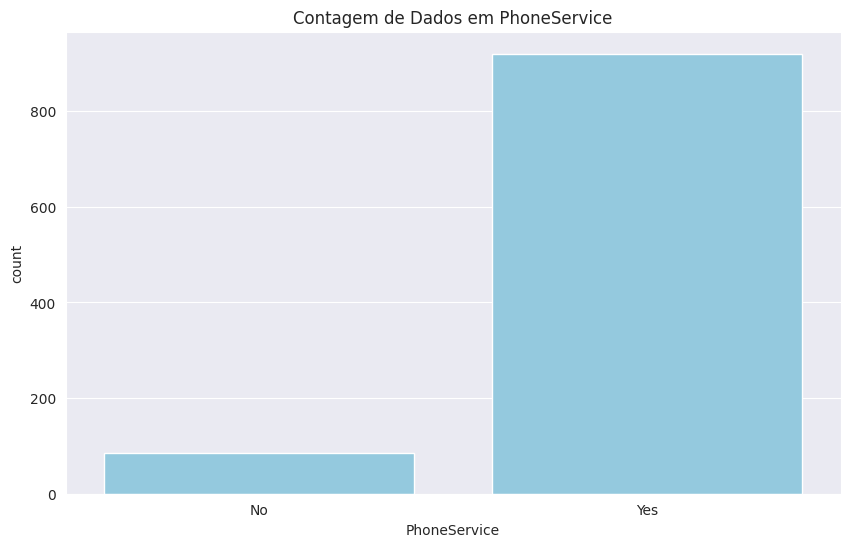

In [31]:
# Verifica contagem de dados na coluna
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PhoneService', color='skyblue')
plt.title('Contagem de Dados em PhoneService')
plt.show()

A coluna **PhoneService** apresenta uma predominância de valores "Yes" em 91.4% das entradas. Por ter esse alto percentual, optamos por substituir os valores nulos dessa coluna por **"Yes"**, assumindo que essa é a categoria mais provável.  

Mas, em análises futuras deve-se avaliar se a variável traz informação relevante para o modelo ou se pode ser descartada pela baixa variabilidade.

In [32]:
# Substitui dados nulos por Yes
df['PhoneService'] = df['PhoneService'].fillna('Yes')

# Verifica dados nulos em PhoneService
df['PhoneService'].isnull().any()

np.False_

##### Coluna Pagamento_Mensal

In [33]:
# Média da coluna Pagamento_Mensal
mean_pagamento_mensal = df['Pagamento_Mensal'].mean()
mean_pagamento_mensal

np.float64(65.60756321839081)

In [34]:
# Mediana da coluna Pagamento_Mensal
median_pagamento_mensal = df['Pagamento_Mensal'].median()
median_pagamento_mensal

71.45

Comparando média (65.6) e mediana (71.4), observamos uma pequena diferença. Vamos analisar a distribuição visualmente.

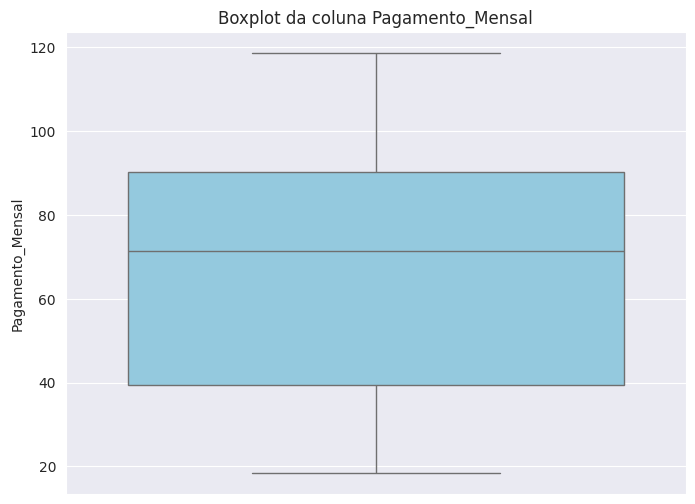

In [35]:
# Plota o boxplot da coluna Pagamento_Mensal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da coluna Pagamento_Mensal')
plt.show()

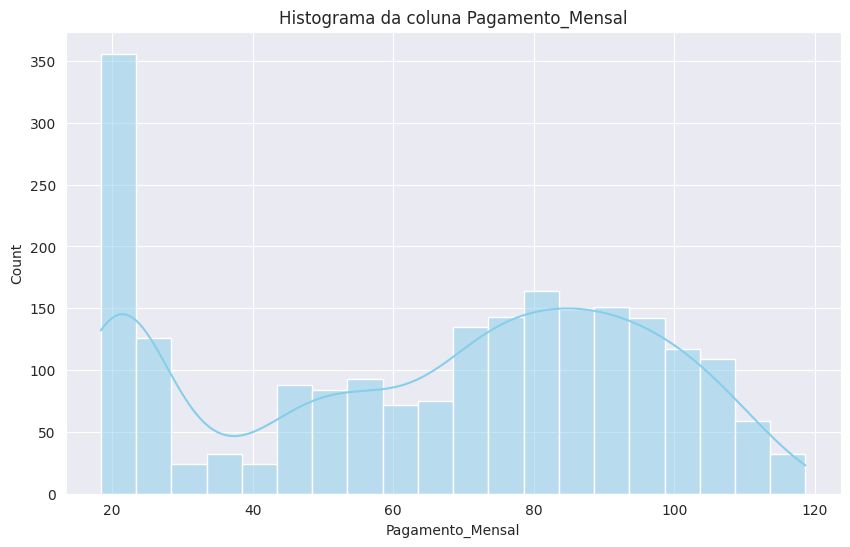

In [36]:
# Plota o histograma da coluna Pagamento_Mensal
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da coluna Pagamento_Mensal')
plt.show()

Não foram identificados outliers na coluna **Pagamento_Mensal**, o que é um aspecto positivo. Considerando que o DataFrame não é volumoso e que 13.0% dos valores estão ausentes nessa coluna, optamos por substituir os dados nulos pela **mediana**, uma vez que é uma medida menos sensível a possíveis variações extremas.


In [37]:
# Substitui dados nulos pela mediana
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(median_pagamento_mensal)

# Verifica dados nulos em Pagamento_Mensal
df['Pagamento_Mensal'].isnull().any()

np.False_

In [38]:
# Verifica dados nulos no DataFrame
df.isnull().values.any()

np.False_

### Tratamento de inconsistências e padronização

In [39]:
# Remove coluna com informações sensíveis
df.drop(columns=['customerID'], inplace=True)

In [40]:
# Seleciona nomes das colunas textuais
colunas_texo = df.select_dtypes(include='object').columns

# Padroniza todos os dados para letras minúsculas
for coluna in colunas_texo:
    df[coluna] = df[coluna].str.lower()

df.sample(5)

,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
691,male,0,yes,yes,31,yes,dsl,yes,yes,no,one year,bank transfer (automatic),75.25,2344.50,no
2322,female,0,no,yes,49,yes,no,no internet service,no internet service,no internet service,two year,credit card (automatic),20.45,1024.65,no
1580,female,1,yes,no,21,yes,dsl,no,no,no,one year,bank transfer (automatic),71.70,1497.05,no
1440,male,0,yes,yes,8,yes,no,no internet service,no internet service,no internet service,one year,credit card (automatic),19.90,153.95,no
1198,female,0,no,no,42,yes,no,no internet service,no internet service,no internet service,two year,bank transfer (automatic),20.75,844.45,no


In [41]:
# Seleciona colunas textuais
df_colunas_texo = df.select_dtypes(include='object')

# Verifica dados únicos
for coluna in df_colunas_texo:
    print(coluna, df[coluna].unique())

Genero ['female' 'male' 'f' 'm']
Casado ['yes' 'no']
Dependents ['no' 'yes']
PhoneService ['no' 'yes']
Servico_Internet ['dsl' 'no' 'fiber optic']
Servico_Seguranca ['no' 'yes' 'no internet service']
Suporte_Tecnico ['no' 'yes' 'no internet service']
StreamingTV ['no' 'no internet service' 'yes']
Tipo_Contrato ['month-to-month' 'one year' 'two year']
PaymentMethod ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Churn ['no' 'yes']


Observamos que a coluna **Genero** possui inconsistências nos dados. Vamos fazer as substituições necessárias.

In [42]:
# Uniformização de dados em Genero
df['Genero'] = df['Genero'].replace({'f': 'female', 'm': 'male'})

# Confere dados únicos
df['Genero'].unique()

array(['female', 'male'], dtype=object)

In [43]:
# Padroniza o nome das colunas em inglês
columns = {
    'Genero': 'Gender',
    'Idoso': 'IsSenior',
    'Casado': 'Married',
    'Tempo_como_Cliente': 'ClientMonths',
    'Servico_Internet': 'InternetService',
    'Servico_Seguranca': 'OnlineSecurity',
    'Suporte_Tecnico': 'TechSupport',
    'Tipo_Contrato': 'ContractType',
    'Pagamento_Mensal': 'MonthlyCharges',
    'Total_Pago': 'TotalCharges',
}

df.rename(columns=columns, inplace=True)

df.sample(5)

,Gender,IsSenior,Married,Dependents,ClientMonths,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,ContractType,PaymentMethod,MonthlyCharges,TotalCharges,Churn
99,female,1,yes,no,25,yes,fiber optic,no,no,yes,month-to-month,electronic check,71.45,2514.50,yes
592,male,0,yes,yes,63,yes,dsl,yes,no,yes,two year,credit card (automatic),83.50,5435.00,no
1019,female,0,no,no,23,yes,no,no internet service,no internet service,no internet service,month-to-month,mailed check,19.50,470.20,no
1015,male,0,yes,yes,12,yes,dsl,no,no,no,one year,credit card (automatic),53.65,696.35,yes
131,female,0,yes,yes,25,no,dsl,yes,no,yes,month-to-month,credit card (automatic),71.45,1502.65,yes


In [44]:
# Salvando o DataFrame
df.to_csv('churn_telecom_tratado.csv', index=False)